In [1]:
%run ../../common/import_all.py

from common.setup_notebook import set_css_style, setup_matplotlib, config_ipython

from sklearn.linear_model import LinearRegression

config_ipython()
setup_matplotlib()
set_css_style()

# Be careful with data

Analysing and working with data is not a straightforward activity, especially in the part about deriving information out of it. Data analysis is a respectable activity which deserves carefulness! Here we present a few results on this topic which are meant to underline what we mean.

## The Anscombe's quartet

Anscombe, in [[1]](#1) (a brilliant paper by the way, one of the cases where you go *old but gold*), makes the case for inspecting data, through visualisation, on top of looking at aggregated statistics. It's the famous concept of the "Anscombe's" quartet, four sets of data with the same statistical metrics and that then fit to the same regression but that look quite different when plotted.

Anscombe makes the point that it's always a good idea to inspect the data visually beyond running aggregated analyses on it, so that a little exploratory work can inform better. In the specifics, you can see what is wrong here: even if the datasets respond to the same regression results, in realuty only the first one fits the data well. 

### The four datasets (from the original paper)

In [2]:
x1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

x2 = x1.copy()
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])

x3 = x1.copy()
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

### Aggregated statistics of them

In [3]:
np.mean(x1), np.mean(x2), np.mean(x3), np.mean(x4)
np.mean(y1), np.mean(y2), np.mean(y3), np.mean(y4)

np.std(x1), np.std(x2), np.std(x3), np.std(x4)
np.std(y1), np.std(y2), np.std(y3), np.std(y4)

(9.0, 9.0, 9.0, 9.0)

(7.5009090909090927, 7.5009090909090901, 7.5, 7.500909090909091)

(3.1622776601683795,
 3.1622776601683795,
 3.1622776601683795,
 3.1622776601683795)

(1.937024215108669, 1.9371086914896201, 1.9359329439927313, 1.9360806451340837)

### Fit a linear regression for each

In [20]:
l1 = LinearRegression()
l1.fit(x1.reshape(11, 1), y1)

l2 = LinearRegression()
l2.fit(x2.reshape(11, 1), y2)

l3 = LinearRegression()
l3.fit(x3.reshape(11, 1), y3)

l4 = LinearRegression()
l4.fit(x4.reshape(11, 1), y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
l1.coef_, l1.intercept_
l2.coef_, l2.intercept_
l3.coef_, l3.intercept_
l4.coef_, l4.intercept_

(array([ 0.50009091]), 3.0000909090909094)

(array([ 0.5]), 3.0009090909090892)

(array([ 0.49972727]), 3.0024545454545448)

(array([ 0.49990909]), 3.0017272727272726)

### Plot both the data points and the regression lines

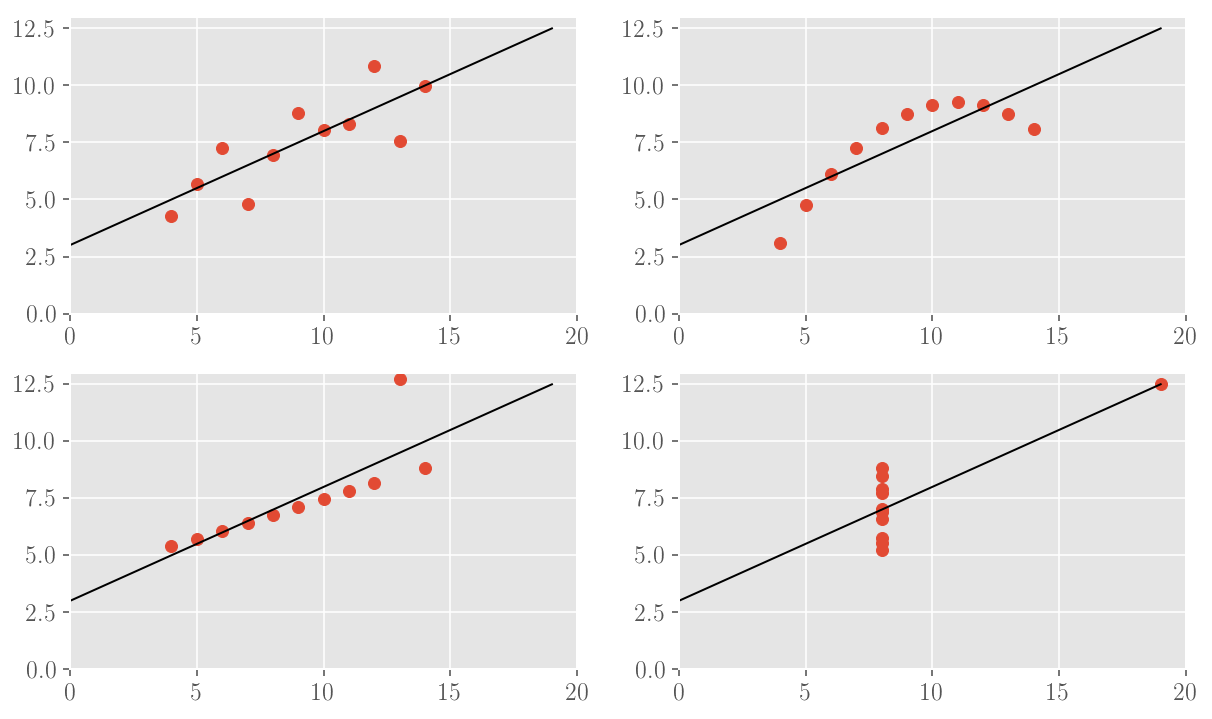

In [23]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.scatter(x1, y1)
ax1.plot(np.arange(0, 20), l1.intercept_ + l1.coef_ * np.arange(0, 20), c='k', lw=1)
ax1.set_xlim([0, 20])
ax1.set_ylim([0, 13])

ax2.scatter(x2, y2)
ax2.plot(np.arange(0, 20), l2.intercept_ + l2.coef_ * np.arange(0, 20), c='k', lw=1)
ax2.set_xlim([0, 20])
ax2.set_ylim([0, 13])

ax3.scatter(x3, y3)
ax3.plot(np.arange(0, 20), l3.intercept_ + l3.coef_ * np.arange(0, 20), c='k', lw=1)
ax3.set_xlim([0, 20])
ax3.set_ylim([0, 13])

ax4.scatter(x4, y4)
ax4.plot(np.arange(0, 20), l4.intercept_ + l4.coef_ * np.arange(0, 20), c='k', lw=1)
ax4.set_xlim([0, 20])
ax4.set_ylim([0, 13])

plt.show();

## References

1. <a name="anscombe"></a> F J Anscombe, [**Graphs in Statistical Analysis**](http://ww.w.lithoguru.com/scientist/statistics/Anscombe_Graphs%20in%20Statistical%20Analysis_1973.pdf), *The American Statistician*, 27, 1, 1973